https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

In [1]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.datasets import make_blobs as mb
import matplotlib.pyplot as plt
import timeit as tm

In [2]:
centre = [[0, 0],
          [1000, 0],
          [1000, 1000],
          [0, 1000]]
dataset, labels = mb(n_samples = 1000, centers = centre, cluster_std = 200)

In [3]:
dataset

array([[ 857.67099963,  454.54774126],
       [1130.30093104,  653.02392077],
       [ -41.51915498,  160.5563004 ],
       ...,
       [-137.98250572,  829.03433459],
       [ -17.64882515, 1185.46493772],
       [1168.66019087, -117.11308386]])

In [4]:
labels

array([1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 3, 1, 2, 3, 3, 0, 1, 0, 3,
       0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 3, 1, 0, 0, 0, 3, 2, 3, 1,
       2, 2, 0, 0, 3, 1, 1, 1, 2, 2, 2, 3, 2, 0, 3, 2, 0, 3, 3, 3, 0, 0,
       1, 1, 3, 2, 2, 2, 2, 1, 0, 0, 3, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0,
       1, 0, 2, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3, 1, 2, 1, 3, 2, 0, 3, 2, 1,
       2, 0, 0, 3, 2, 3, 1, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 3, 2, 0, 0,
       2, 2, 1, 2, 1, 3, 2, 3, 3, 2, 3, 2, 0, 3, 0, 1, 0, 1, 1, 3, 1, 3,
       2, 0, 3, 3, 1, 3, 1, 3, 3, 0, 2, 0, 1, 3, 1, 0, 1, 3, 2, 2, 3, 2,
       0, 0, 2, 3, 0, 0, 3, 1, 3, 1, 1, 0, 0, 1, 3, 3, 0, 2, 1, 3, 1, 1,
       3, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 2, 3, 0, 2, 0, 2, 0, 3, 3, 3,
       2, 0, 1, 3, 2, 3, 1, 1, 0, 1, 2, 1, 0, 2, 1, 3, 3, 2, 3, 0, 1, 0,
       3, 2, 2, 2, 0, 2, 2, 1, 1, 3, 2, 0, 3, 0, 0, 2, 3, 1, 3, 2, 2, 1,
       1, 0, 1, 3, 2, 0, 3, 3, 0, 3, 2, 0, 2, 3, 1, 2, 1, 2, 1, 1, 3, 2,
       2, 3, 2, 3, 1, 1, 0, 2, 0, 1, 3, 2, 2, 0, 2,

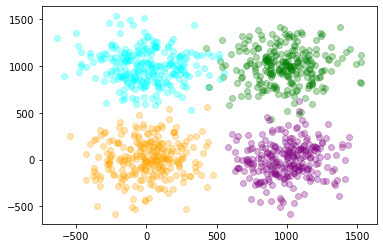

In [5]:
color = ['orange', 'purple', 'green', 'cyan']
for i in range(len(dataset)):
    plt.scatter(dataset[i][0], dataset[i][1], 
                color = color[labels[i]], alpha = 0.3)

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import silhouette_score

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

Text(0, 0.5, 'Silhouette Score')

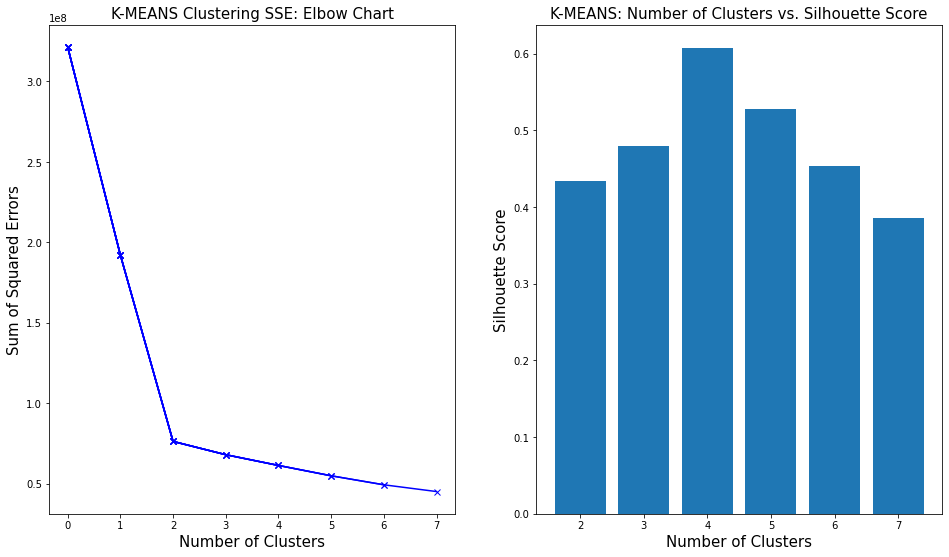

In [8]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=10
cost=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(dataset)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(dataset, KMeans(n_clusters = n_cluster).fit_predict(dataset))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15) 

# silhouette_score suggests 4 clusters and per image it is the correct one. 

In [12]:
dataset.shape

(1000, 2)

In [9]:
kmeans = KMeans(n_clusters=4, random_state=0)
start = tm.default_timer()
kmeans.fit(dataset)
end = tm.default_timer()
a = kmeans.labels_
centers = kmeans.cluster_centers_
print(end-start)

0.06205130000034842


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


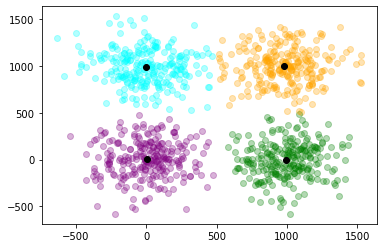

In [10]:
for i in range(len(dataset)):
    plt.scatter(dataset[i][0],dataset[i][1], color = color[a[i]], alpha = 0.3)
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], color = 'black')

# Training a Model Using Mini Batch K-means Algorithm

In [11]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size = 20, random_state=0)
start = tm.default_timer()
kmeans.fit(dataset)
end = tm.default_timer()
a = kmeans.labels_
centers = kmeans.cluster_centers_
print(end-start)

0.12567870000020775


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


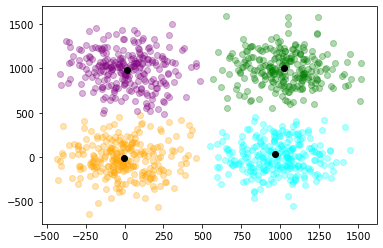

In [14]:
for i in range(len(dataset)):
    plt.scatter(dataset[i][0],dataset[i][1], color = color[a[i]], alpha = 0.3)
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], color = 'black')

As we can see that predictions of the kmeans and mini-batch kmeans algorithm are nearly equal. But the major difference is the amount of time taken by the model to train. For a dataset of 1000 data points, the kmeans algorithm has taken more seconds, whereas the mini-batch kmeans algorithm has taken less seconds.
Same result but using less computation. 
So making small batches of the dataset and training the model using the small subsets of the dataset is quite efficient.

In [16]:
from sklearn.datasets import make_blobs

In [19]:
# Load data in X
batch_size = 600
centers = [[1, 1], [-2, -1], [1, -2], [1, 9]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples = 3000,
                            centers = centers,
                            cluster_std = 0.9)

In [20]:
X.shape

(3000, 2)

In [21]:
# perform the mini batch K-means
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 4,
                      batch_size = batch_size, n_init = 10,
                      max_no_improvement = 10, verbose = 0)

In [23]:
import numpy as np 

In [24]:
mbk.fit(X)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=3
  warnings.warn(


In [25]:
mbk_means_cluster_centers

array([[-1.98178072, -2.00443834],
       [ 1.0108204 , -1.04862588],
       [ 1.03364207,  1.02935669],
       [ 1.08011927,  9.01441769]])

In [26]:
a = mbk.labels_

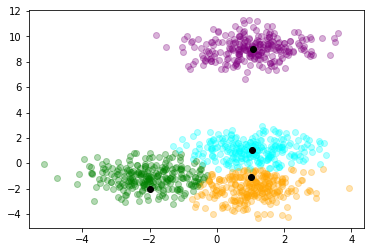

In [27]:
for i in range(len(dataset)):
    plt.scatter(X[i][0],X[i][1], color = color[a[i]], alpha = 0.3)
for i in range(len(centers)):
    plt.scatter(mbk_means_cluster_centers[i][0], mbk_means_cluster_centers[i][1], color = 'black')

In [13]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs as blobs
import matplotlib.pyplot as plt
import timeit as t

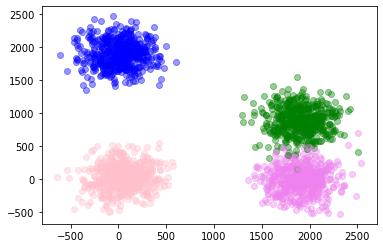

In [14]:
c = [[50, 50],[1900, 0],[1900, 900],[0, 1900]]
data, data_labels = blobs(n_samples = 2000, centers = c, cluster_std = 200)

color = ['pink', 'violet', 'green', 'blue']
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color = color[data_labels[i]], alpha = 0.4)

In [15]:
data.shape

(2000, 2)

In [16]:
k_means = MiniBatchKMeans(n_clusters=4, batch_size = 40)
st = t.default_timer()
k_means.fit(data)
e = t.default_timer()
label_a = k_means.labels_
cnt = k_means.cluster_centers_
print("Time taken : ",e-st)

Time taken :  0.13031729999966046


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


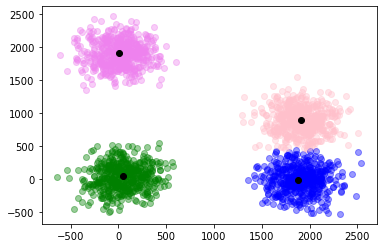

In [17]:
for i in range(len(data)):
    plt.scatter(data[i][0],data[i][1], color = color[label_a[i]], alpha = 0.4)
for i in range(len(cnt)):
    plt.scatter(cnt[i][0], cnt[i][1], color = 'black')

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [19]:
url = 'https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%201/Data/customers.csv'

data = pd.read_csv(url)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
data_encode = data.copy()

le = preprocessing.LabelEncoder()
data_encode['Gender'] = le.fit_transform(data_encode['Gender'])
data_encode

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [21]:
df = data_encode.copy()
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

# We can see clearly in the below chart that there are 5 different groups. (Clusters)

Text(0, 0.5, 'Spending Score')

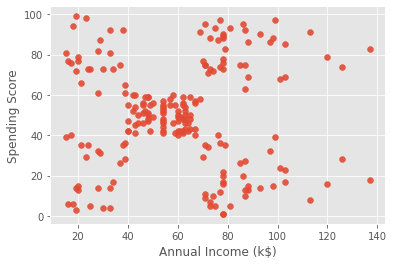

In [22]:
# set the plotting style to 'ggplot'
plt.style.use('ggplot')

plt.scatter(x, y, s=35, alpha=0.9)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

In [ ]:
k_means = MiniBatchKMeans(n_clusters=4, batch_size = 40)
st = t.default_timer()
k_means.fit(data)
e = t.default_timer()
label_a = k_means.labels_
cnt = k_means.cluster_centers_
print("Time taken : ",e-st)

In [23]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].values

In [24]:
X.shape

(200, 2)

In [29]:
kmeans =  MiniBatchKMeans(n_clusters=5, init='k-means++', n_init='auto',batch_size = 20, random_state=0)
st = t.default_timer()
kmeans.fit(X)
e = t.default_timer()
label_a = kmeans.labels_
cnt = kmeans.cluster_centers_
print("Time taken : ",e-st)

Time taken :  0.0913858000003529


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [35]:
kmeans =  KMeans(n_clusters=5, init='k-means++', n_init='auto', random_state=0)
st = t.default_timer()
kmeans.fit(X)
e = t.default_timer()
label_a = kmeans.labels_
cnt = kmeans.cluster_centers_
print("Time taken : ",e-st)

Time taken :  0.01196319999962725


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
label_a.shape

(200,)

# Mini-batch K Means. 

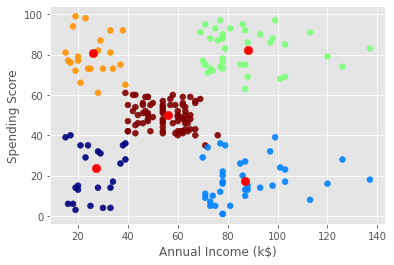

In [34]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=label_a , s=35, alpha=0.9, cmap='jet')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.scatter(cnt[:, 0], cnt[:, 1], c='red', s=70)

# K-Means

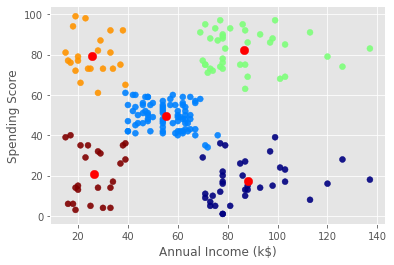

In [36]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=label_a , s=35, alpha=0.9, cmap='jet')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.scatter(cnt[:, 0], cnt[:, 1], c='red', s=70)

# Same results but mini batch kmeans has taken less seconds. Same result but using less computation. So making small batches of the dataset and training the model using the small subsets of the dataset is quite efficient.